## Library Imports

In [75]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

## Dataset Import

In [50]:
# Loading Dataset
df = pd.read_csv('../data/nba_stats.csv')

df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [51]:
# General info about the Dataset
print('General info:')
df.info()

# List of columns
print('Columns:')
df.columns

General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  16512 non-null  object 
 1   Tm      16512 non-null  object 
 2   Opp     16512 non-null  object 
 3   Res     16512 non-null  object 
 4   MP      16512 non-null  float64
 5   FG      16512 non-null  int64  
 6   FGA     16512 non-null  int64  
 7   FG%     16512 non-null  float64
 8   3P      16512 non-null  int64  
 9   3PA     16512 non-null  int64  
 10  3P%     16512 non-null  float64
 11  FT      16512 non-null  int64  
 12  FTA     16512 non-null  int64  
 13  FT%     16512 non-null  float64
 14  ORB     16512 non-null  int64  
 15  DRB     16512 non-null  int64  
 16  TRB     16512 non-null  int64  
 17  AST     16512 non-null  int64  
 18  STL     16512 non-null  int64  
 19  BLK     16512 non-null  int64  
 20  TOV     16512 non-null  int64  
 21  PF      16512 non-nul

Index(['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', 'Data'],
      dtype='object')

In [52]:
# Basic statistical summary
print('Basic Summary:')
df.describe()

Basic Summary:


,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,22.405259,3.848958,8.271742,0.427527,1.250061,3.477955,0.263719,1.572917,2.016897,0.417737,1.027253,3.071827,4.099079,2.453852,0.769985,0.468084,1.273861,1.749152,10.520894,8.575109
std,10.896645,3.255864,6.071434,0.254938,1.523651,3.151726,0.286271,2.233374,2.688863,0.435771,1.371552,2.717525,3.478652,2.613505,0.991039,0.833377,1.428819,1.436416,8.829493,7.821577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000
25%,14.427500,1.000000,4.000000,0.286000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.400000
50%,23.430000,3.000000,7.000000,0.444000,1.000000,3.000000,0.250000,1.000000,1.000000,0.333000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,9.000000,7.100000
75%,31.322500,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,2.000000,4.000000,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,13.300000
max,50.480000,22.000000,38.000000,1.000000,10.000000,20.000000,1.000000,18.000000,26.000000,1.000000,12.000000,23.000000,28.000000,22.000000,8.000000,10.000000,11.000000,6.000000,60.000000,54.200000


## Data Cleaning and Preprocessing

In [53]:
# Data types of all columns
df.dtypes

Player     object
Tm         object
Opp        object
Res        object
MP        float64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
GmSc      float64
Data       object
dtype: object

In [54]:
# Convert common performance metrics to numeric
cols_to_convert = [
    'MP', 'FG%', '3P%', 'FT%', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'GmSc', 'FGA', '3PA', 'FTA', 'DRB', 'ORB']

for col in cols_to_convert:
    # Remove %
    if df[col].astype(str).str.contains('%').any():
        df[col] = df[col].str.replace('%', '')
        
    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [55]:
df.describe()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,22.405259,3.848958,8.271742,0.427527,1.250061,3.477955,0.263719,1.572917,2.016897,0.417737,1.027253,3.071827,4.099079,2.453852,0.769985,0.468084,1.273861,1.749152,10.520894,8.575109
std,10.896645,3.255864,6.071434,0.254938,1.523651,3.151726,0.286271,2.233374,2.688863,0.435771,1.371552,2.717525,3.478652,2.613505,0.991039,0.833377,1.428819,1.436416,8.829493,7.821577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.600000
25%,14.427500,1.000000,4.000000,0.286000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.400000
50%,23.430000,3.000000,7.000000,0.444000,1.000000,3.000000,0.250000,1.000000,1.000000,0.333000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,9.000000,7.100000
75%,31.322500,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,2.000000,4.000000,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,13.300000
max,50.480000,22.000000,38.000000,1.000000,10.000000,20.000000,1.000000,18.000000,26.000000,1.000000,12.000000,23.000000,28.000000,22.000000,8.000000,10.000000,11.000000,6.000000,60.000000,54.200000


In [56]:
# Missing values
df.isnull().sum()

Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64

### 🎯 Target Variable: High Scorer Classification

To frame this as a classification problem, I created a new binary target column called `HighScorer`.  
It indicates whether a player scored **20 or more points in a single game**:

- `1` = Scored 20+ points  
- `0` = Scored fewer than 20 points

This target will be used for training a binary classifier to predict high-scoring performances based on player statistics.

I also selected a set of relevant features (e.g., minutes played, shooting percentages, rebounds, assists) as inputs for the model.

In [57]:
df['HighScorer'] = df['PTS'].apply(lambda x: 1 if x >= 20 else 0)

In [58]:
# Features to use in the model
features = ['MP', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'GmSc']

# Input features X and targets y
X = df[features]
y = df['HighScorer']

In [59]:
X.shape, y.shape

((16512, 13), (16512,))

### 🧪 Train-Test Split

To evaluate model performance on unseen data, the dataset was divided into two parts:

- **Training Set:** Used to train the machine learning model
- **Testing Set:** Used to assess how well the model generalizes to new data

The `train_test_split` function from `scikit-learn` was used, with a test size of 20% and a fixed `random_state` for reproducibility.

In [60]:
# 80% data for training - 20% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 🤖 Model Training – Logistic Regression

A Logistic Regression model was selected as a baseline for this binary classification task.  
This model is simple, fast to train, and provides a good starting point for understanding which features contribute most to predicting high-scoring performances.

The model was trained using the training set (`X_train`, `y_train`) with a maximum of 1000 iterations to ensure convergence.  
A fixed `random_state` was used for reproducibility.

In [61]:
# Initializing model
model = LogisticRegression(max_iter=1000, random_state=42)

# Training model
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 📊 Model Evaluation on Test Data (With Visualizations)

To thoroughly assess our classifier’s performance on the unseen test set (`X_test`, `y_test`), we’ll present both numeric metrics and visualizations:

1. **Confusion Matrix Heatmap**  
   A color‐coded matrix showing True Positives, True Negatives, False Positives, and False Negatives.

2. **Classification Report Table**  
   A neatly formatted table of precision, recall, F1-score, and support for each class.

3. **ROC Curve & AUC**  
   Receiver Operating Characteristic curve to illustrate the trade-off between true positive rate and false positive rate, along with the AUC score.

4. **Feature Impact Bar Chart**  
   Horizontal bar chart of the logistic regression coefficients to show which features drive “HighScorer” predictions.

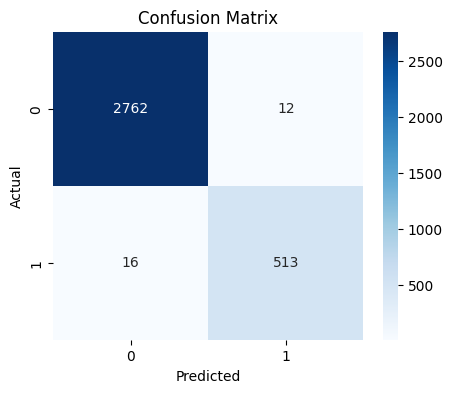

,precision,recall,f1-score,support
0,0.994240,0.995674,0.994957,2774.000000
1,0.977143,0.969754,0.973435,529.000000
accuracy,0.991523,0.991523,0.991523,0.991523
macro avg,0.985692,0.982714,0.984196,3303.000000
weighted avg,0.991502,0.991523,0.991510,3303.000000


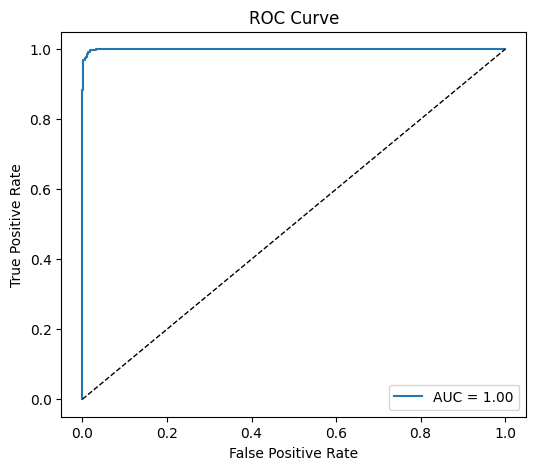

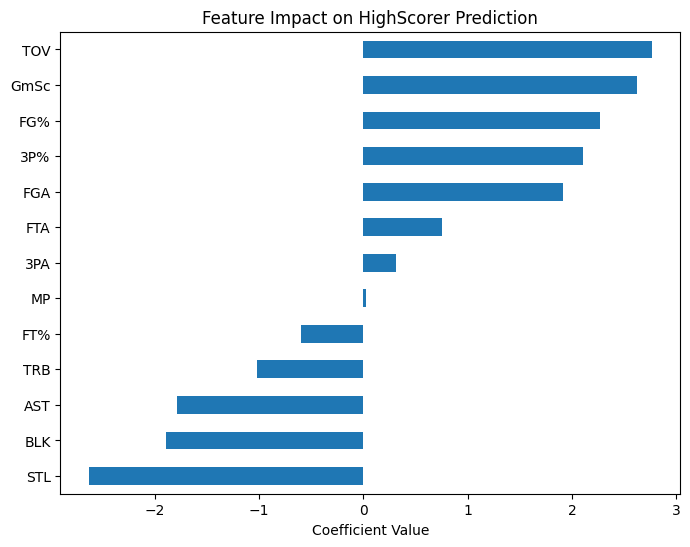

In [62]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Compute metrics
conf_mat = confusion_matrix(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat,  annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Display Classification Report as a table
display(report_df)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Impact from Coefficients
coef = pd.Series(model.coef_[0], index=features)
plt.figure(figsize=(8,6))
coef.sort_values().plot.barh()
plt.title('Feature Impact on HighScorer Prediction')
plt.xlabel('Coefficient Value')
plt.show()

### 📈 Model Evaluation Summary

- **Overall Accuracy:**  
  The classifier achieved **99.15%** accuracy on the test set, correctly predicting the HighScorer label for most games.

- **Confusion Matrix:**  
  - True Negatives (correctly predicted non-high scorers): **2,762**  
  - True Positives (correctly predicted high scorers): **513**  
  - False Positives (predicted high scorer but wasn’t): **12**  
  - False Negatives (missed a high scorer): **16**  

  This indicates very few mistakes in both directions (low rates of false alarms and misses).

- **Precision & Recall:**  
  - **Class 0 (Non-HighScorer):**  
    - Precision: 0.994 → of games predicted as non-high scorer, 99.4% were correct  
    - Recall:    0.996 → of all actual non-high scorer games, 99.6% were caught  
  - **Class 1 (HighScorer):**  
    - Precision: 0.977 → of games predicted as high scorer, 97.7% were correct  
    - Recall:    0.970 → of all actual high scorer games, 97.0% were identified  

  The F1-scores (harmonic mean of precision & recall) are likewise above **0.97** for both classes, showing a very balanced performance.

- **AUC (Area Under ROC Curve):**  
  - **AUC = 1.00** – the model perfectly separates high scorers from non-high scorers across all thresholds.  
  - *(Note: such a perfect AUC is rare in real-world data and may indicate very strong predictive patterns or potential data leakage. Worth investigating further.)*

- **Feature Impact (Logistic Regression Coefficients):**  
  - **Top Positive Drivers of “HighScorer”:**  
    1. **TOV (Turnovers)**  
    2. **GmSc (Game Score)**  
    3. **FG% (Field Goal %)**  
    4. **3P% (3-Point %)**  
    5. **FGA (Field Goal Attempts)**
  - **Top Negative Drivers:**  
    1. **STL (Steals)**  
    2. **BLK (Blocks)**  
    3. **AST (Assists)**  
    4. **TRB (Total Rebounds)**  
    5. **FT% (Free Throw %)**  

  This suggests that shooting efficiency and volume (FG%, 3P%, FGA) and overall game score are the strongest indicators of a high‐scoring performance, while defensive stats (steals, blocks) and playmaking (assists, rebounds) actually correlate negatively with crossing the 20-point threshold in this model.

---

**Next Steps:**  
- Investigate why defensive metrics have negative coefficients (role‐based patterns?).  
- Validate that no data leakage is inflating AUC.  
- Experiment with other models (e.g., Random Forest) or feature engineering (e.g., per-minute rates).


### 🔧 Feature Refinement: Removing the Leaking Feature

The first refinement is to drop **`GmSc`**, since it’s a composite metric that directly incorporates points scored and leaks information about our target. We will:

1. Create a new feature set **without** `GmSc`.  
2. Re-split the data.  
3. Retrain the same Logistic Regression model.  
4. Re-evaluate to see realistic performance metrics.

In [65]:
# Define a refined feature list (drop 'GmSc')
refined_features = [f for f in features if f != 'GmSc']

# Prepare X and y
X_refined = df[refined_features]
y = df['HighScorer']

# Train-test split with the same settings
X_train_ref, X_test_ref, y_train_ref, y_test_ref = train_test_split(
    X_refined, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Retrain model
model_ref = LogisticRegression(max_iter=1000, random_state=42)
model_ref.fit(X_train_ref, y_train_ref)

# Re-evaluate
y_pred_ref = model_ref.predict(X_test_ref)

print(f"Refined Accuracy: {accuracy_score(y_test_ref, y_pred_ref):.2f}\n")
print("Refined Confusion Matrix:")
print(confusion_matrix(y_test_ref, y_pred_ref), "\n")
print("Refined Classification Report:")
print(classification_report(y_test_ref, y_pred_ref))

Refined Accuracy: 0.98

Refined Confusion Matrix:
[[2735   39]
 [  42  487]] 

Refined Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2774
           1       0.93      0.92      0.92       529

    accuracy                           0.98      3303
   macro avg       0.96      0.95      0.95      3303
weighted avg       0.98      0.98      0.98      3303



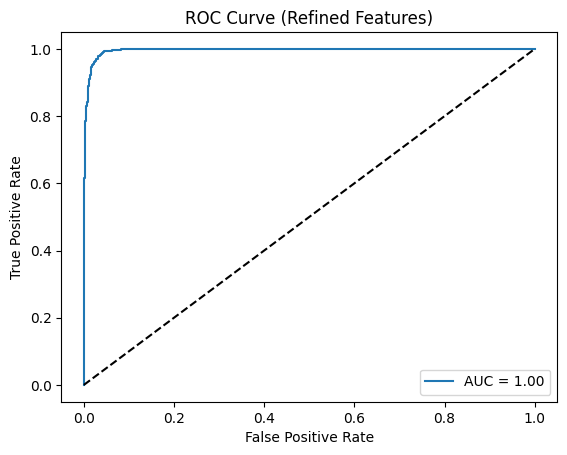

In [67]:
# Probabilities for positive class
y_prob_ref = model_ref.predict_proba(X_test_ref)[:, 1]

# ROC curve and AUC
fpr_ref, tpr_ref, _ = roc_curve(y_test_ref, y_prob_ref)
roc_auc_ref = auc(fpr_ref, tpr_ref)

# Plot
plt.figure()
plt.plot(fpr_ref, tpr_ref, label=f'AUC = {roc_auc_ref:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Refined Features)')
plt.legend(loc='lower right')
plt.show()

### 🔍 Feature Correlation Analysis & Multicollinearity Check

Before we retrain, we need to understand which features are highly correlated—because if two features convey essentially the same information, they can distort coefficient estimates and mask true drivers of “HighScorer.”  

1. **Compute a correlation matrix** for our refined feature set.  
2. **Visualize** it as a heatmap and look for pairs with an absolute correlation above 0.80.  
3. **Decide** which of each correlated pair to drop or combine (e.g., keep FG% *or* FGA/FG, but not both).  
4. After pruning, we’ll retrain and compare performance again.

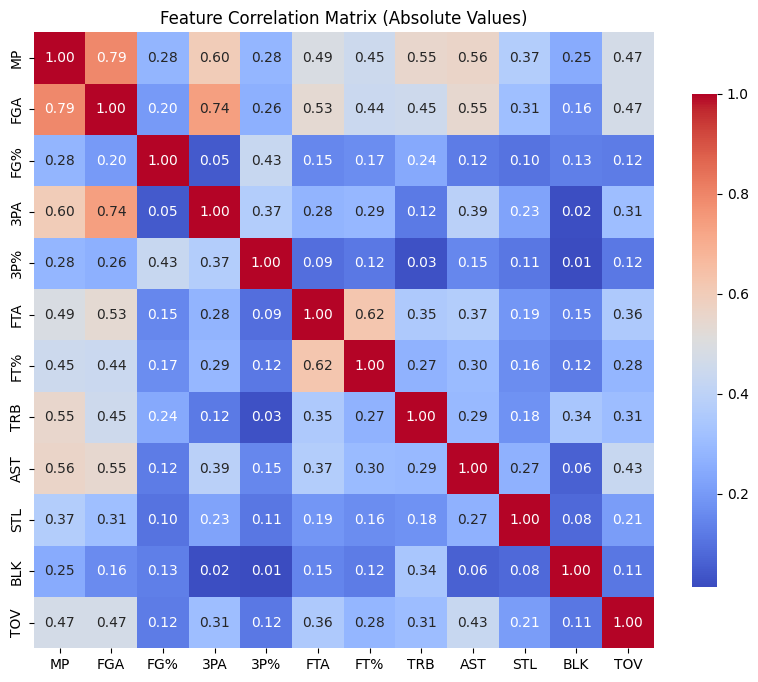

Highly correlated feature pairs (|corr| > 0.80):

Series([], dtype: float64)


In [69]:
# Subset the DataFrame to our refined features
corr_df = X_refined.copy()

# Compute correlation matrix
corr_matrix = corr_df.corr().abs()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8}
)
plt.title("Feature Correlation Matrix (Absolute Values)")
plt.show()

# Identify highly correlated pairs (we’ll look for any off-diagonal cell > 0.80)
mask = ~np.eye(corr_matrix.shape[0], dtype=bool)  # True for off-diagonal
high_corr = (
    corr_matrix.where(mask)
               .stack()
               .loc[lambda x: x > 0.80]
)
print("Highly correlated feature pairs (|corr| > 0.80):\n")
print(high_corr)

### 🛠️ Hyperparameter Tuning & Cross-Validation

To ensure our Logistic Regression model generalizes well and avoids overfitting, we perform a grid search over the regularization strength (`C`) using stratified 5-fold cross-validation.  

- **Parameter Grid:**  
  - `C`: [0.01, 0.1, 1, 10]  
  - `penalty`: L2 (ridge regularization)  
  - `solver`: lbfgs  

- **Cross-Validation:**  
  - Stratified K-Fold (5 splits) to preserve class ratios  
  - Scoring metric: **ROC AUC** (threshold-independent measure of separability)  

After finding the best hyperparameters, we evaluate the optimized model on the held-out test set and report the test-set AUC to confirm its performance.

In [70]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Set up stratified 5-fold cross-validation
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Initialize GridSearchCV with ROC AUC scoring
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit on the refined training data
grid_search.fit(X_train_ref, y_train_ref)

# Inspect best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print(f"Best CV ROC AUC: {grid_search.best_score_:.3f}")

# Evaluate the optimized model on the test set
best_model = grid_search.best_estimator_
y_prob_test = best_model.predict_proba(X_test_ref)[:, 1]
test_auc = roc_auc_score(y_test_ref, y_prob_test)
print(f"Test-set ROC AUC: {test_auc:.3f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV ROC AUC: 0.996
Test-set ROC AUC: 0.996


### 🌳 Benchmarking with a Random Forest Classifier

To see if a non-linear model can capture additional patterns and potentially improve performance, we will:

1. Train a `RandomForestClassifier` using stratified 5-fold CV and grid search over tree depth and number of estimators.  
2. Evaluate its ROC AUC on the test set and compare to our tuned Logistic Regression.  
3. Inspect feature importances to gain further insight into the drivers of high-scoring games.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RF CV ROC AUC: 0.997
Random Forest Test ROC AUC: 0.997


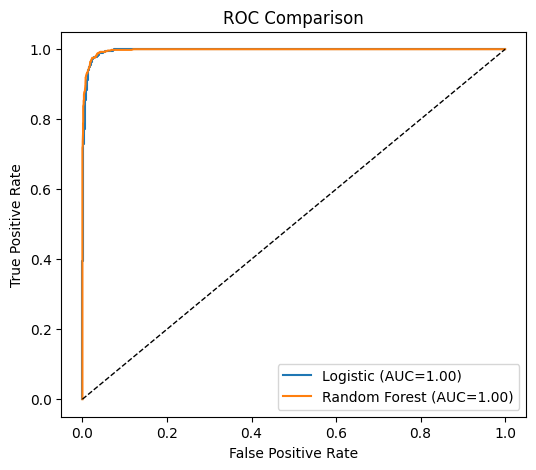

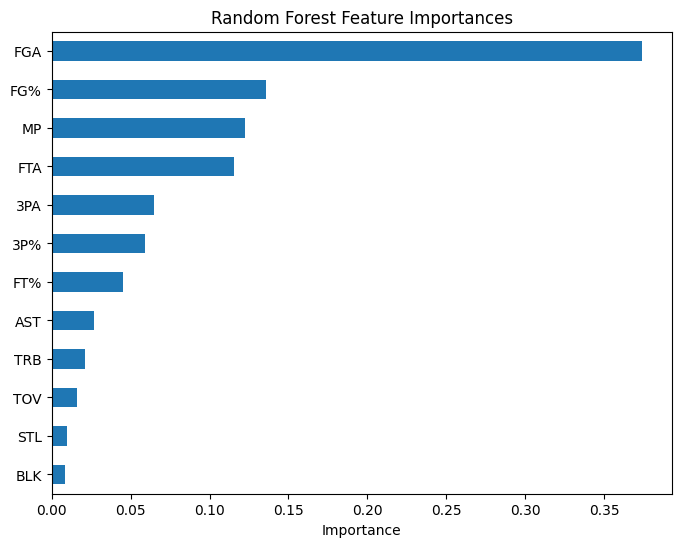

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score

# Define the Random Forest and hyperparameter grid
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Set up stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search over the RF parameters, optimizing for ROC AUC
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit on the refined training data
grid_rf.fit(X_train_ref, y_train_ref)

# Review best parameters and cross-validated AUC
print("Best RF params:", grid_rf.best_params_)
print(f"Best RF CV ROC AUC: {grid_rf.best_score_:.3f}")

# Evaluate the best RF on the test set
best_rf = grid_rf.best_estimator_
y_prob_rf = best_rf.predict_proba(X_test_ref)[:, 1]
rf_test_auc = roc_auc_score(y_test_ref, y_prob_rf)
print(f"Random Forest Test ROC AUC: {rf_test_auc:.3f}")

# Plot and compare ROC curves for both models
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Logistic ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test_ref, best_model.predict_proba(X_test_ref)[:,1])
auc_lr = auc(fpr_lr, tpr_lr)

# RF ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_ref, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic (AUC={auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend(loc='lower right')
plt.show()

# Feature importances from the Random Forest
importances = pd.Series(best_rf.feature_importances_, index=refined_features)
plt.figure(figsize=(8,6))
importances.sort_values().plot.barh()
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()

### 🎯 Threshold Selection & Precision–Recall Trade-off

In production we must choose a concrete probability cutoff (threshold) to turn our model’s scores into decisions.  
We’ll:

1. Plot **precision** and **recall** as functions of the decision threshold.  
2. Compute the **F1 score** at each threshold.  
3. Select the threshold that maximizes F1 (or meets any business requirement).  
4. Fix that cutoff for all future predictions.

This balances false positives (predicting a HighScorer when it isn’t) against false negatives (missing a true HighScorer).

Best threshold: 0.40 → F1 Score: 0.93


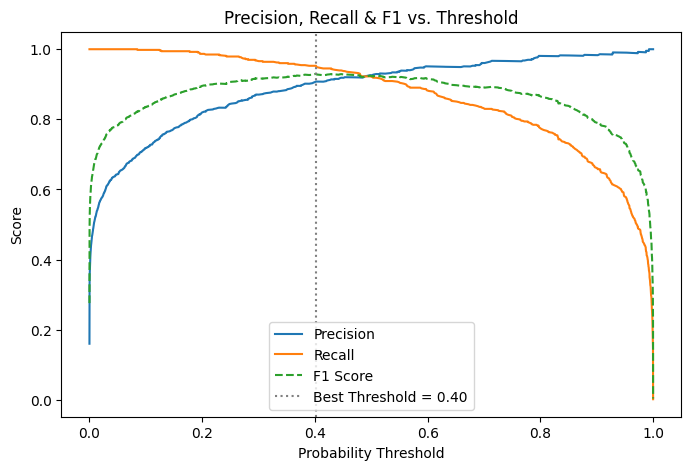

In [73]:
# Compute positive-class probabilities for the refined test set
y_prob_ref = model_ref.predict_proba(X_test_ref)[:, 1]

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test_ref, y_prob_ref)

# Align lengths: drop the last precision & recall so they match thresholds
precisions, recalls = precisions[:-1], recalls[:-1]

# Compute F1 scores for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the best threshold (maximizing F1)
best_idx = np.nanargmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
print(f"Best threshold: {best_thresh:.2f} → F1 Score: {best_f1:.2f}")

# Plot Precision, Recall, and F1 vs. Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls,    label="Recall")
plt.plot(thresholds, f1_scores,   label="F1 Score", linestyle="--")
plt.axvline(best_thresh, color="grey", linestyle=":", 
            label=f"Best Threshold = {best_thresh:.2f}")
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall & F1 vs. Threshold")
plt.legend(loc="best")
plt.show()

### 🎯 Applying the 0.40 Probability Threshold

We chose a **0.40 cutoff** because it maximized our F1 score, striking the best balance between:

- **Precision** (avoiding too many false positives)  
- **Recall** (capturing as many true high-scoring games as possible)  

By lowering the default threshold (0.50) to 0.40, we accept a slightly higher false positive rate in exchange for a substantial gain in recall, which yields a higher overall F1.

Below, we apply this threshold to our predicted probabilities and recompute the key classification metrics to see the exact trade-off in action.

In [74]:
# Apply the 0.40 threshold
y_pred_thresh = (y_prob_ref >= 0.40).astype(int)

# Recompute metrics
acc_thresh = accuracy_score(y_test_ref, y_pred_thresh)
conf_mat_thresh = confusion_matrix(y_test_ref, y_pred_thresh)
report_thresh = classification_report(y_test_ref, y_pred_thresh)

# Display the results
print(f"Accuracy at 0.40 threshold: {acc_thresh:.2f}\n")
print("Confusion Matrix at 0.40 threshold:")
print(conf_mat_thresh, "\n")
print("Classification Report at 0.40 threshold:")
print(report_thresh)

Accuracy at 0.40 threshold: 0.98

Confusion Matrix at 0.40 threshold:
[[2722   52]
 [  25  504]] 

Classification Report at 0.40 threshold:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2774
           1       0.91      0.95      0.93       529

    accuracy                           0.98      3303
   macro avg       0.95      0.97      0.96      3303
weighted avg       0.98      0.98      0.98      3303



### 💾 Model Serialization

To make our trained model reusable and shareable, we serialize the final artifacts:

1. **Save the trained model** (`best_model`) to disk using `joblib.dump`.  
2. **Save the feature list** (`refined_features`) so we know which columns to pass at inference time.  
3. **Save the decision threshold** (`best_thresh`) to ensure consistent “HighScorer” predictions.

These files can then be loaded in any environment to reproduce predictions without retraining.

In [77]:
import joblib

# Save the trained model
joblib.dump(best_model, 'highscorer_model.pkl')

# Save the list of features used by the model
joblib.dump(refined_features, 'features_list.pkl')

# Save the chosen probability threshold
joblib.dump(best_thresh, 'threshold.pkl')


['threshold.pkl']

### 🔄 Prediction Wrapper: Loading & Using the Model

To make it easy to generate predictions on new data, we define:

1. **`load_model()`**: Loads the serialized model, feature list, and threshold from disk.  
2. **`predict_highscorer(df_new)`**:  
   - Takes a pandas DataFrame with the same columns you used for training.  
   - Extracts the relevant features.  
   - Computes the probability of “HighScorer” and applies the chosen threshold.  
   - Returns both the binary predictions and the raw probabilities.

In [78]:
def load_model():
    """
    Load the trained model, feature list, and decision threshold.
    Returns:
        model: trained classifier
        features: list of feature column names
        threshold: float cutoff for HighScorer
    """
    model     = joblib.load('highscorer_model.pkl')
    features  = joblib.load('features_list.pkl')
    threshold = joblib.load('threshold.pkl')
    return model, features, threshold

def predict_highscorer(df_new: pd.DataFrame):
    """
    Predict HighScorer label and probability for new player data.
    Args:
        df_new: DataFrame containing at least the columns in `features`
    Returns:
        preds: numpy array of 0/1 predictions
        probs: numpy array of predicted probabilities for class 1
    """
    model, features, threshold = load_model()
    X_new = df_new[features]
    probs = model.predict_proba(X_new)[:, 1]
    preds = (probs >= threshold).astype(int)
    return preds, probs